# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 6. Поиск эволюционирующих шаблонов с помощью матричного профиля ряда.**

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install stumpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.5/176.5 kB 4.6 MB/s eta 0:00:00


In [ ]:
import os
import sys
practice_dir_path = '/content/drive/MyDrive/Временные ряды/06 Chains/'
#sys.path.append(os.path.abspath("/content/drive/MyDrive/Временные ряды/02 Similarity search/modules/"))
os.chdir(practice_dir_path)

## **Часть 1.** Поиск цепочек временного ряда.

Импорт библиотек и модулей

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import stumpy
from sklearn.metrics import mean_squared_error

В первом задании вам предстоит выполнить поиск эволюционирующих шаблонов временного ряда. Выполните считывание набора данных [Rotation Matrix](datasets/Rotation%20Matrix.txt), найдите в нем самую длинную цепочку и выведите индексы начала звеньев этой цепочки.

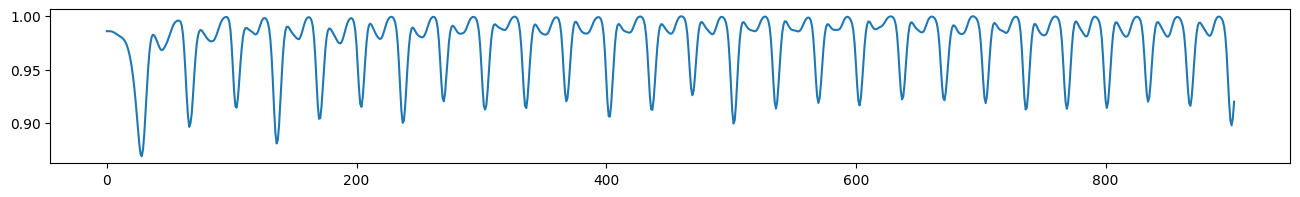

In [ ]:
fig, ax = plt.subplots(figsize=(16, 2))
ts = np.loadtxt('datasets/Rotation Matrix.txt')
ax.plot(ts)

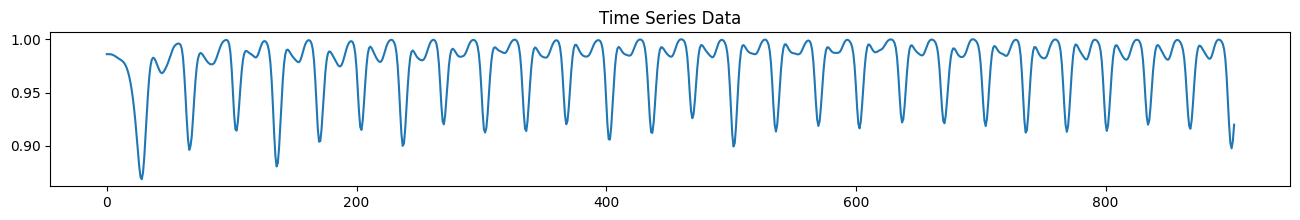

Индексы начала звеньев самой длинной цепочки мотивов: [446 811 778 746 345 214 614 713 547 681]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import stumpy

# Загрузка данных
fig, ax = plt.subplots(figsize=(16, 2))
ts = np.loadtxt('datasets/Rotation Matrix.txt')

# Если временной ряд двумерный, выбираем одну из колонок
if ts.ndim > 1:
    ts = ts[:, 0]  # Например, выбираем первую колонку

ax.plot(ts)
plt.title("Time Series Data")
plt.show()

# Установка длины окна
m = 50  # Длина окна

# Вычисление матричного профиля с k ближайшими соседями
k = 3  # Количество ближайших соседей
mp_full = stumpy.stump(ts, m, k=k)

# Агрегация многомерного профиля в одномерный
mp = np.mean(mp_full[:, :k], axis=1)

# Использование матричного профиля для поиска мотивов
motifs = stumpy.motifs(ts, mp)

# Разбираем результат
motif_values, motif_indices = motifs  # Разбираем кортеж
longest_chain_indices = motif_indices[0]  # Извлекаем первую цепочку индексов

# Вывод информации о мотиве
print(f"Индексы начала звеньев самой длинной цепочки мотивов: {longest_chain_indices}")

# # Визуализация цепочки
# plt.figure(figsize=(16, 6))
# plt.plot(ts, label="Time Series")
# for idx in longest_chain_indices:
#     plt.axvline(x=idx, color='red', linestyle='--', label='Chain Start' if idx == longest_chain_indices[0] else "")
# plt.title("Самая длинная цепочка эволюционирующих шаблонов")
# plt.legend()
# plt.show()


❓ Проанализируйте и изложите содержательный смысл полученных результатов.

## **Часть 2. Визуализация цепочек**

Выполните визуализацию найденных в прошлом задании цепочек: постройте график временного ряда, на котором выделены звенья цепочек. Также постройте график, на котором изображены только сами звенья.

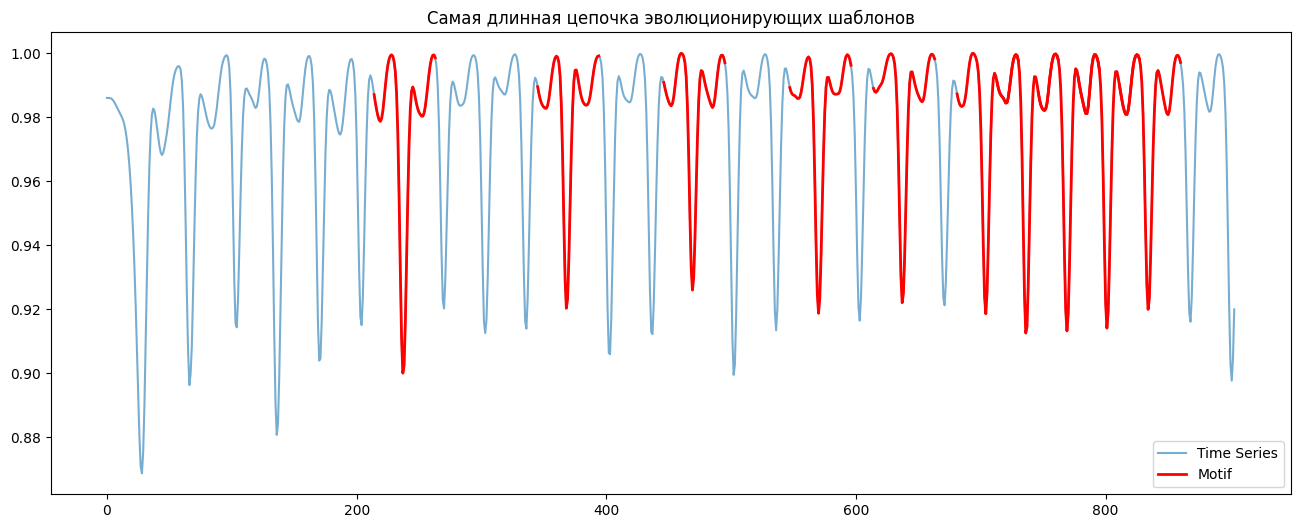

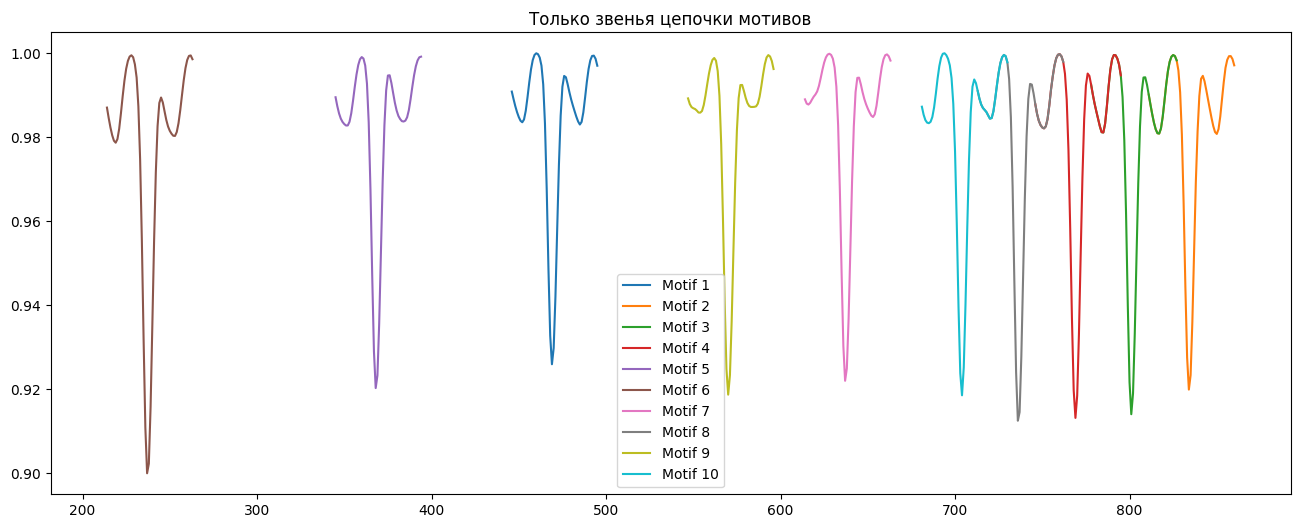

In [ ]:
# INSERT YOUR CODE
# Визуализация цепочек
plt.figure(figsize=(16, 6))
plt.plot(ts, label="Time Series", alpha=0.6)  # Оригинальный временной ряд

# Выделяем цепочки мотивов
for idx in longest_chain_indices:
    plt.plot(
        range(idx, idx + m), ts[idx:idx + m],
        color='red', linewidth=2, label='Motif' if idx == longest_chain_indices[0] else ""
    )

plt.title("Самая длинная цепочка эволюционирующих шаблонов")
plt.legend()
plt.show()

plt.figure(figsize=(16, 6))

# Собираем и рисуем только звенья
for i, idx in enumerate(longest_chain_indices):
    plt.plot(
        range(idx, idx + m), ts[idx:idx + m],
        label=f'Motif {i + 1}'
    )

plt.title("Только звенья цепочки мотивов")
plt.legend()
plt.show()



❓ Проанализируйте и изложите содержательный смысл полученных результатов.

## **Часть 3.** Предсказывание значений ряда на основе цепочек.

Предскажите значения последнего звена цепочки, вычислив разность между двумя предыдущими звеньями цепочки. Сравните полученное предсказание с истинным значением.

Предсказанное последнее звено цепочки:
[0.9874653  0.98661078 0.98653852 0.98680638 0.98692483 0.98669872
 0.98654163 0.98724438 0.9878908  0.98913563 0.9907887  0.9928968
 0.9949333  0.9966189  0.9977715  0.99812128 0.99711074 0.99363898
 0.9858249  0.97193632 0.9532902  0.9358416  0.92571492 0.92489362
 0.93210214 0.9444967  0.95910176 0.9727265  0.98316846 0.98948665
 0.9921114  0.9923381  0.9916058  0.99092877 0.9907132  0.99094533
 0.99147462 0.9920592  0.99234017 0.99210698 0.9916807  0.99177285
 0.99293024 0.9954179  0.997665   0.99912216 0.9994291  0.99864812
 0.99699765 0.9944801 ]

Истинное последнее звено цепочки:
[0.9872379  0.9853275  0.9840558  0.98344314 0.98331845 0.9836527
 0.98479235 0.987072   0.99031913 0.99392915 0.9969051  0.99890107
 0.99984586 0.9999585  0.9995173  0.9986402  0.9970969  0.9940676
 0.98792154 0.9766159  0.95943093 0.93950677 0.9237814  0.9185266
 0.92517066 0.9402058  0.9583068  0.9745172  0.9859576  0.9920083
 0.99372005 0.9928382  0.9909669  0.

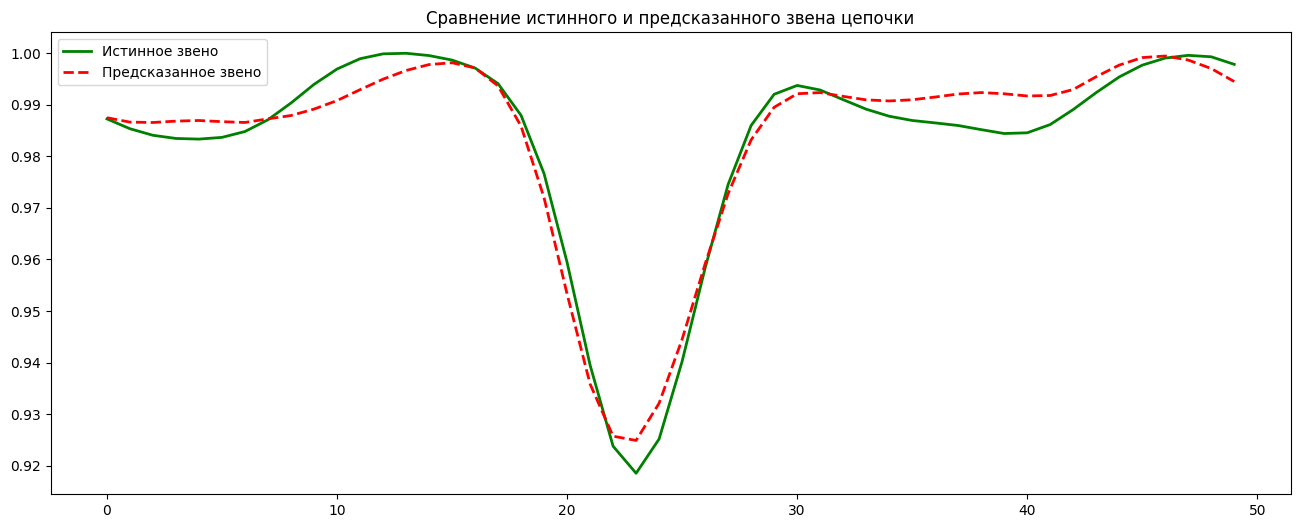

In [ ]:
# INSERT YOUR CODE
# Выбираем последние три звена
second_last_idx = longest_chain_indices[-2]
third_last_idx = longest_chain_indices[-3]
last_idx = longest_chain_indices[-1]

# Извлекаем данные для звеньев
third_last_motif = ts[third_last_idx:third_last_idx + m]
second_last_motif = ts[second_last_idx:second_last_idx + m]
last_motif_actual = ts[last_idx:last_idx + m]

# Вычисляем разность между предпоследним и третьим звеньями
difference = second_last_motif - third_last_motif

# Предсказываем последнее звено
last_motif_predicted = second_last_motif + difference

# Сравнение предсказания с истинным значением
mse = np.mean((last_motif_predicted - last_motif_actual)**2)

print("Предсказанное последнее звено цепочки:")
print(last_motif_predicted)

print("\nИстинное последнее звено цепочки:")
print(last_motif_actual)

print(f"\nСреднеквадратичная ошибка (MSE) между предсказанным и истинным звеном: {mse:.4f}")

# Визуализация
plt.figure(figsize=(16, 6))
plt.plot(range(m), last_motif_actual, label="Истинное звено", color="green", linewidth=2)
plt.plot(range(m), last_motif_predicted, label="Предсказанное звено", color="red", linestyle="--", linewidth=2)
plt.title("Сравнение истинного и предсказанного звена цепочки")
plt.legend()
plt.show()

❓ Проанализируйте и изложите содержательный смысл полученных результатов.